<a href="https://colab.research.google.com/github/RxnAch/DeepLearning/blob/main/Non_Linear_Activation_Functions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U d2l

In [ ]:
!pip install torchviz

In [13]:
%matplotlib inline
import torch 
from d2l import torch as d2l
from torchviz import make_dot

***Multilayer perceptron*** adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.

Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function.

***ReLU Function***

The most popular choice, due to both simplicity of implementation and its good performance on a variety of predictive tasks, is the rectified linear unit (ReLU)

****ReLU(x)=max(x,0)****

The ****sigmoid and hyperbolic tangent activation functions**** cannot be used in networks with many layers due to the vanishing gradient problem.

The ****rectified linear activation function**** overcomes the vanishing gradient problem, allowing models to learn faster and perform better.


The ****rectified linear activation**** is the default activation when developing multilayer Perceptron and convolutional neural networks

In [29]:
x = torch.arange(-8.0,8.0,0.1,requires_grad=True)
y = torch.relu(x)
x.shape

torch.Size([160])

[How do I visualize a net in Pytorch?](https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch)

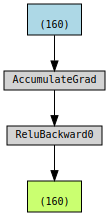

In [26]:
make_dot(y) #Computational Graph which shows mathematical operations

ReLU function retains only positive element and discards all negative elements by setting correspoding activations to 0.The activation function is [piecewise linear](http://www-eio.upc.es/lceio/manuals/cplex75/doc/concert12/doc/userman/html/usingPiecewiseLin3.html).

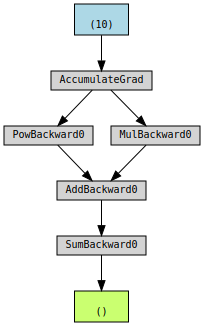

In [97]:
#More on Computational Graph
p=torch.ones(10, requires_grad=True) 
q=p**2
s=p*3
r=(q+s).sum()
make_dot(r)

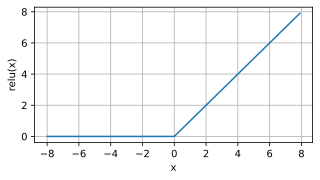

In [28]:
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

**When the input is negative,the derivative of ReLU is 0, and when the input is positive, the derivative of ReLU function is 1.**

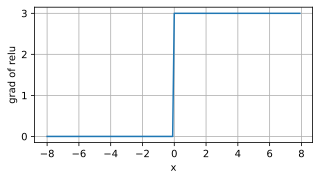

In [33]:
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of relu', figsize = (5,2.5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


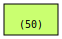

In [94]:
a = torch.arange(-5.0,5.0,0.2,requires_grad=False)
b = torch.range(5,54,requires_grad = False)
z = a*b
make_dot(z)



****The Sigmoid Function**** transfroms its inputs , for which values lies in domain R(real numbers), to outputs that lie in interval (0,1). Often called ***Sqashing Function***.

sigmoid(x)=1/(1+exp(−x)).

 Note that when the input is close to 0, the sigmoid function approaches a linear transformation.

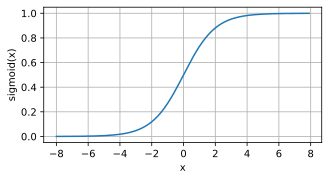

In [96]:
y = torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),'x','sigmoid(x)',figsize = (5,2.5))

The derivative of sigmoid function is given by following equations: 
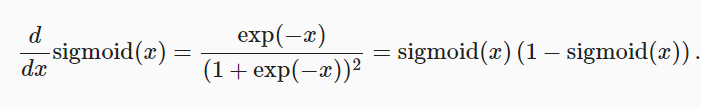


The derivative of the sigmoid function is plotted below. When the input is 0, the derivative of sigmoid function reaches a maximum of 0.25.

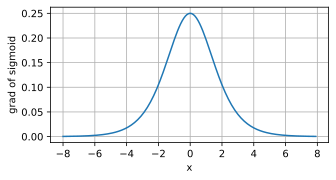

In [65]:
#Clear out previous gradients
x.grad.data.zero_() 
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize = (5,2.5))

****Tanh Function****
Like the sigmoid function , the tanh(hyperbolic tangent) function also sqaushes its inputs, into the interval (-1,1)

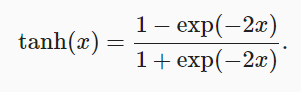

***Mean of tanh function would be closer to zero when compared to sigmoid.***

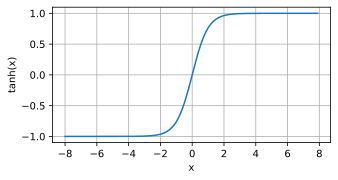

In [66]:
y = torch.tanh(x)
d2l.plot(x.detach(),y.detach(),'x','tanh(x)',figsize = (5,2.5))

The derivative of the tanh function is: 

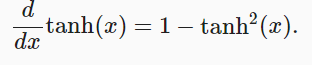

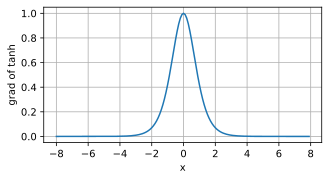

In [68]:
#clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize = (5,2.5))


 [**pReLU Activation Function**](https://medium.com/@shoray.goel/prelu-activation-e294bb21fefa)

A Parametric Rectified Linear Unit, or PReLU, is an activation function that generalizes the traditional rectified unit with a slope for negative values.

(Left) ReLU, (Middle) LeakyReLU and (Last) PReLU

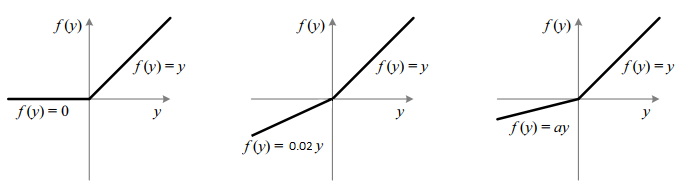


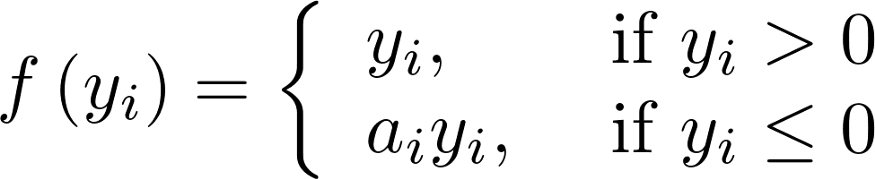

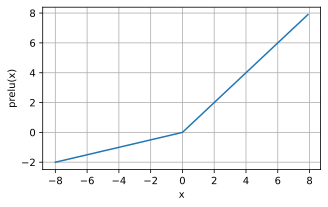

In [87]:
y = torch.prelu(x,weight=torch.torch.FloatTensor([0.25]))
d2l.plot(x.detach(),y.detach(),'x','prelu(x)',figsize = (5,3))

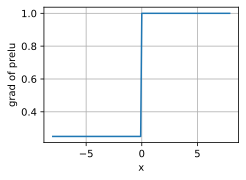

In [89]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph = True)
d2l.plot(x.detach(),x.grad,'x','grad of prelu')